<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-2-Sprint-2-Regression/blob/master/Connor_Heraty_Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving AmesHousing.csv to AmesHousing.csv


## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AmesHousing.csv')

In [51]:
pd.set_option('display.max_columns', 500)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [0]:
sale_corr = df.corr().tail(1)

In [0]:
sale_corr = sale_corr[sale_corr > .5]
sale_corr = sale_corr.dropna(axis=1, how='all')

In [56]:
sale_corr

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
SalePrice,0.799262,0.558426,0.532974,0.508285,0.63228,0.621676,0.70678,0.545604,0.526965,0.647877,0.640401,1.0


From the bottom row of our correlation heatmap, I have identified the following features to use in our model:
- Overall Qual
- Year Built
- Year Remod/Add
- Mas Vnr Area
- Total Bsmt SF
- 1st Flr SF
- Gr Liv Area
- Full Bath
- Garage Cars
- Garage Area




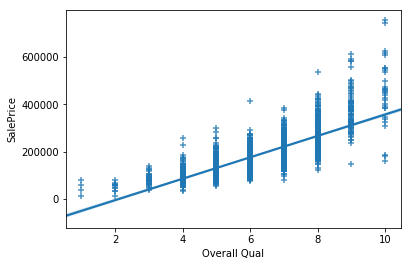

In [8]:
x, y = df['Overall Qual'], df['SalePrice']
ax = sns.regplot(x=x, y=y, marker="+")

In [59]:
df_clean = df[['Overall Qual',
'Year Built',
'Year Remod/Add',
'Mas Vnr Area',
'Total Bsmt SF',
'1st Flr SF',
'Gr Liv Area',
'Full Bath',
'Garage Cars',
'Garage Area',
'SalePrice']]
df_clean.shape

(2930, 11)

In [60]:
df_clean = df_clean.dropna()
df_clean.shape

(2905, 11)

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [61]:
features = ['Overall Qual',
'Year Built',
'Year Remod/Add',
'Mas Vnr Area',
'Total Bsmt SF',
'1st Flr SF',
'Gr Liv Area',
'Full Bath',
'Garage Cars',
'Garage Area']

target = 'SalePrice'

X = df_clean[features]
y = df_clean[target]

# Use Statsmodels to run a regression
from scipy import stats
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1159.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:36:42   Log-Likelihood:                -34572.
No. Observations:                2905   AIC:                         6.917e+04
Df Residuals:                    2894   BIC:                         6.923e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.246e+06    8.5e+04    -14.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [62]:
print(df_clean.shape)
df_clean = df_clean[(np.abs(stats.zscore(df_clean)) < 3).all(axis=1)]
print(df_clean.shape)

(2905, 11)
(2772, 11)


In [63]:
# Re-run regression without outliers.
X = df_clean[features] 
y = df_clean[target]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1394.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:37:08   Log-Likelihood:                -32194.
No. Observations:                2772   AIC:                         6.441e+04
Df Residuals:                    2761   BIC:                         6.448e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.326e+06    6.5e+04    -20.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

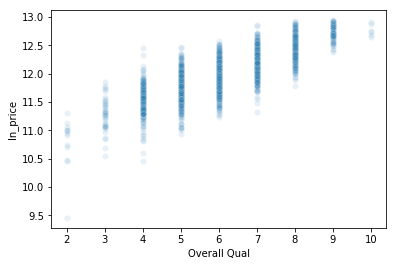

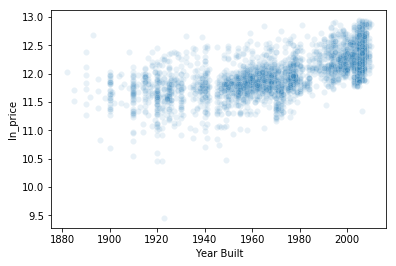

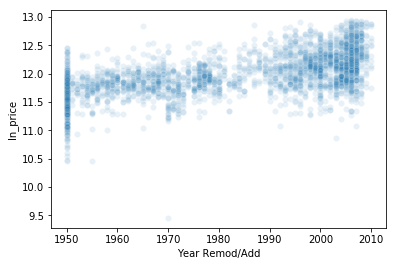

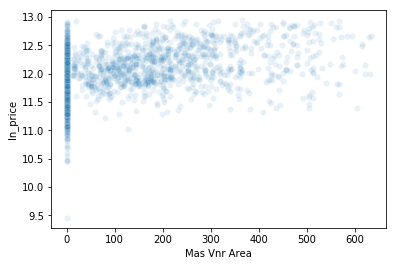

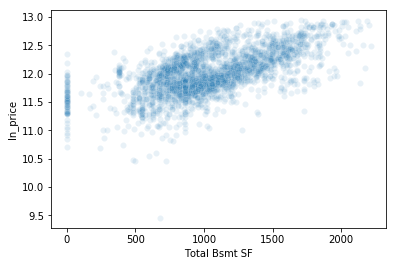

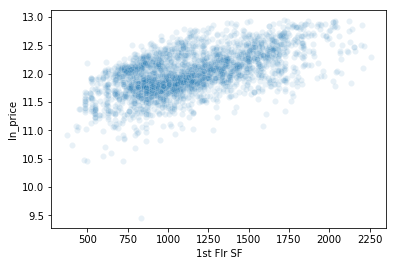

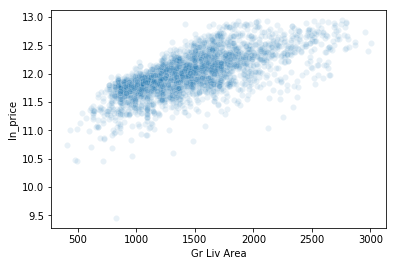

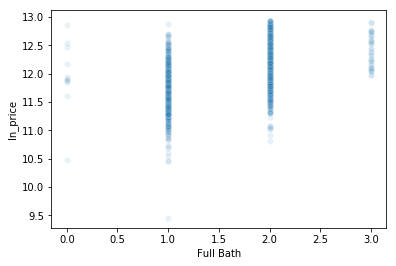

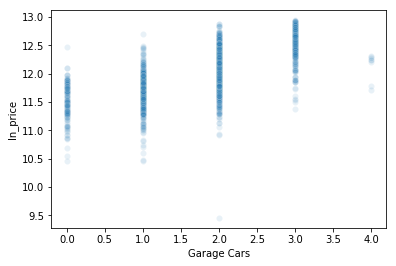

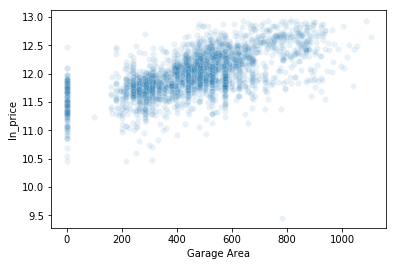

In [64]:
df_clean['ln_price'] = np.log(df['SalePrice'])
df = df_clean.drop(columns='SalePrice')

target = 'ln_price'
features = df.columns.drop(target)
for feature in features:
  sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
  plt.show()


In [66]:
# Log-Linear Regression

X = df[features]
y = df[target]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1447.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:38:10   Log-Likelihood:                 1327.3
No. Observations:                2772   AIC:                            -2633.
Df Residuals:                    2761   BIC:                            -2567.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2495      0.364      6.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const             16258.656130
Overall Qual          2.510877
Year Built            2.345756
Year Remod/Add        1.830650
Mas Vnr Area          1.267144
Total Bsmt SF         2.956862
1st Flr SF            2.960907
Gr Liv Area           2.257702
Full Bath             2.063631
Garage Cars           5.539059
Garage Area           5.091280
dtype: float64

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [68]:
X.corr()

,const,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Qual,NaN,1.000000,0.600310,0.557537,0.378671,0.500595,0.424481,0.534092,0.513142,0.580868,0.538064
Year Built,NaN,0.600310,1.000000,0.612719,0.307801,0.403895,0.310084,0.248513,0.479404,0.542198,0.489504
Year Remod/Add,NaN,0.557537,0.612719,1.000000,0.168622,0.278362,0.216991,0.299281,0.450423,0.414943,0.366219
Mas Vnr Area,NaN,0.378671,0.307801,0.168622,1.000000,0.324917,0.324150,0.319718,0.234035,0.327733,0.326030
Total Bsmt SF,NaN,0.500595,0.403895,0.278362,0.324917,1.000000,0.780289,0.351819,0.306035,0.418645,0.445495
1st Flr SF,NaN,0.424481,0.310084,0.216991,0.324150,0.780289,1.000000,0.468168,0.350229,0.422816,0.451918
Gr Liv Area,NaN,0.534092,0.248513,0.299281,0.319718,0.351819,0.468168,1.000000,0.619852,0.469718,0.444879
Full Bath,NaN,0.513142,0.479404,0.450423,0.234035,0.306035,0.350229,0.619852,1.000000,0.465709,0.397391
Garage Cars,NaN,0.580868,0.542198,0.414943,0.327733,0.418645,0.422816,0.469718,0.465709,1.000000,0.890889


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
# Garage Cars column is highly correlated with the Garage Area column
X = X.drop('Garage Cars', axis=1)

In [71]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1601.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:40:29   Log-Likelihood:                 1321.8
No. Observations:                2772   AIC:                            -2624.
Df Residuals:                    2762   BIC:                            -2564.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1081      0.362      5.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [72]:
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1355.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:40:42   Log-Likelihood:                 1321.8
No. Observations:                2772   AIC:                            -2624.
Df Residuals:                    2762   BIC:                            -2564.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1081      0.395      5.

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

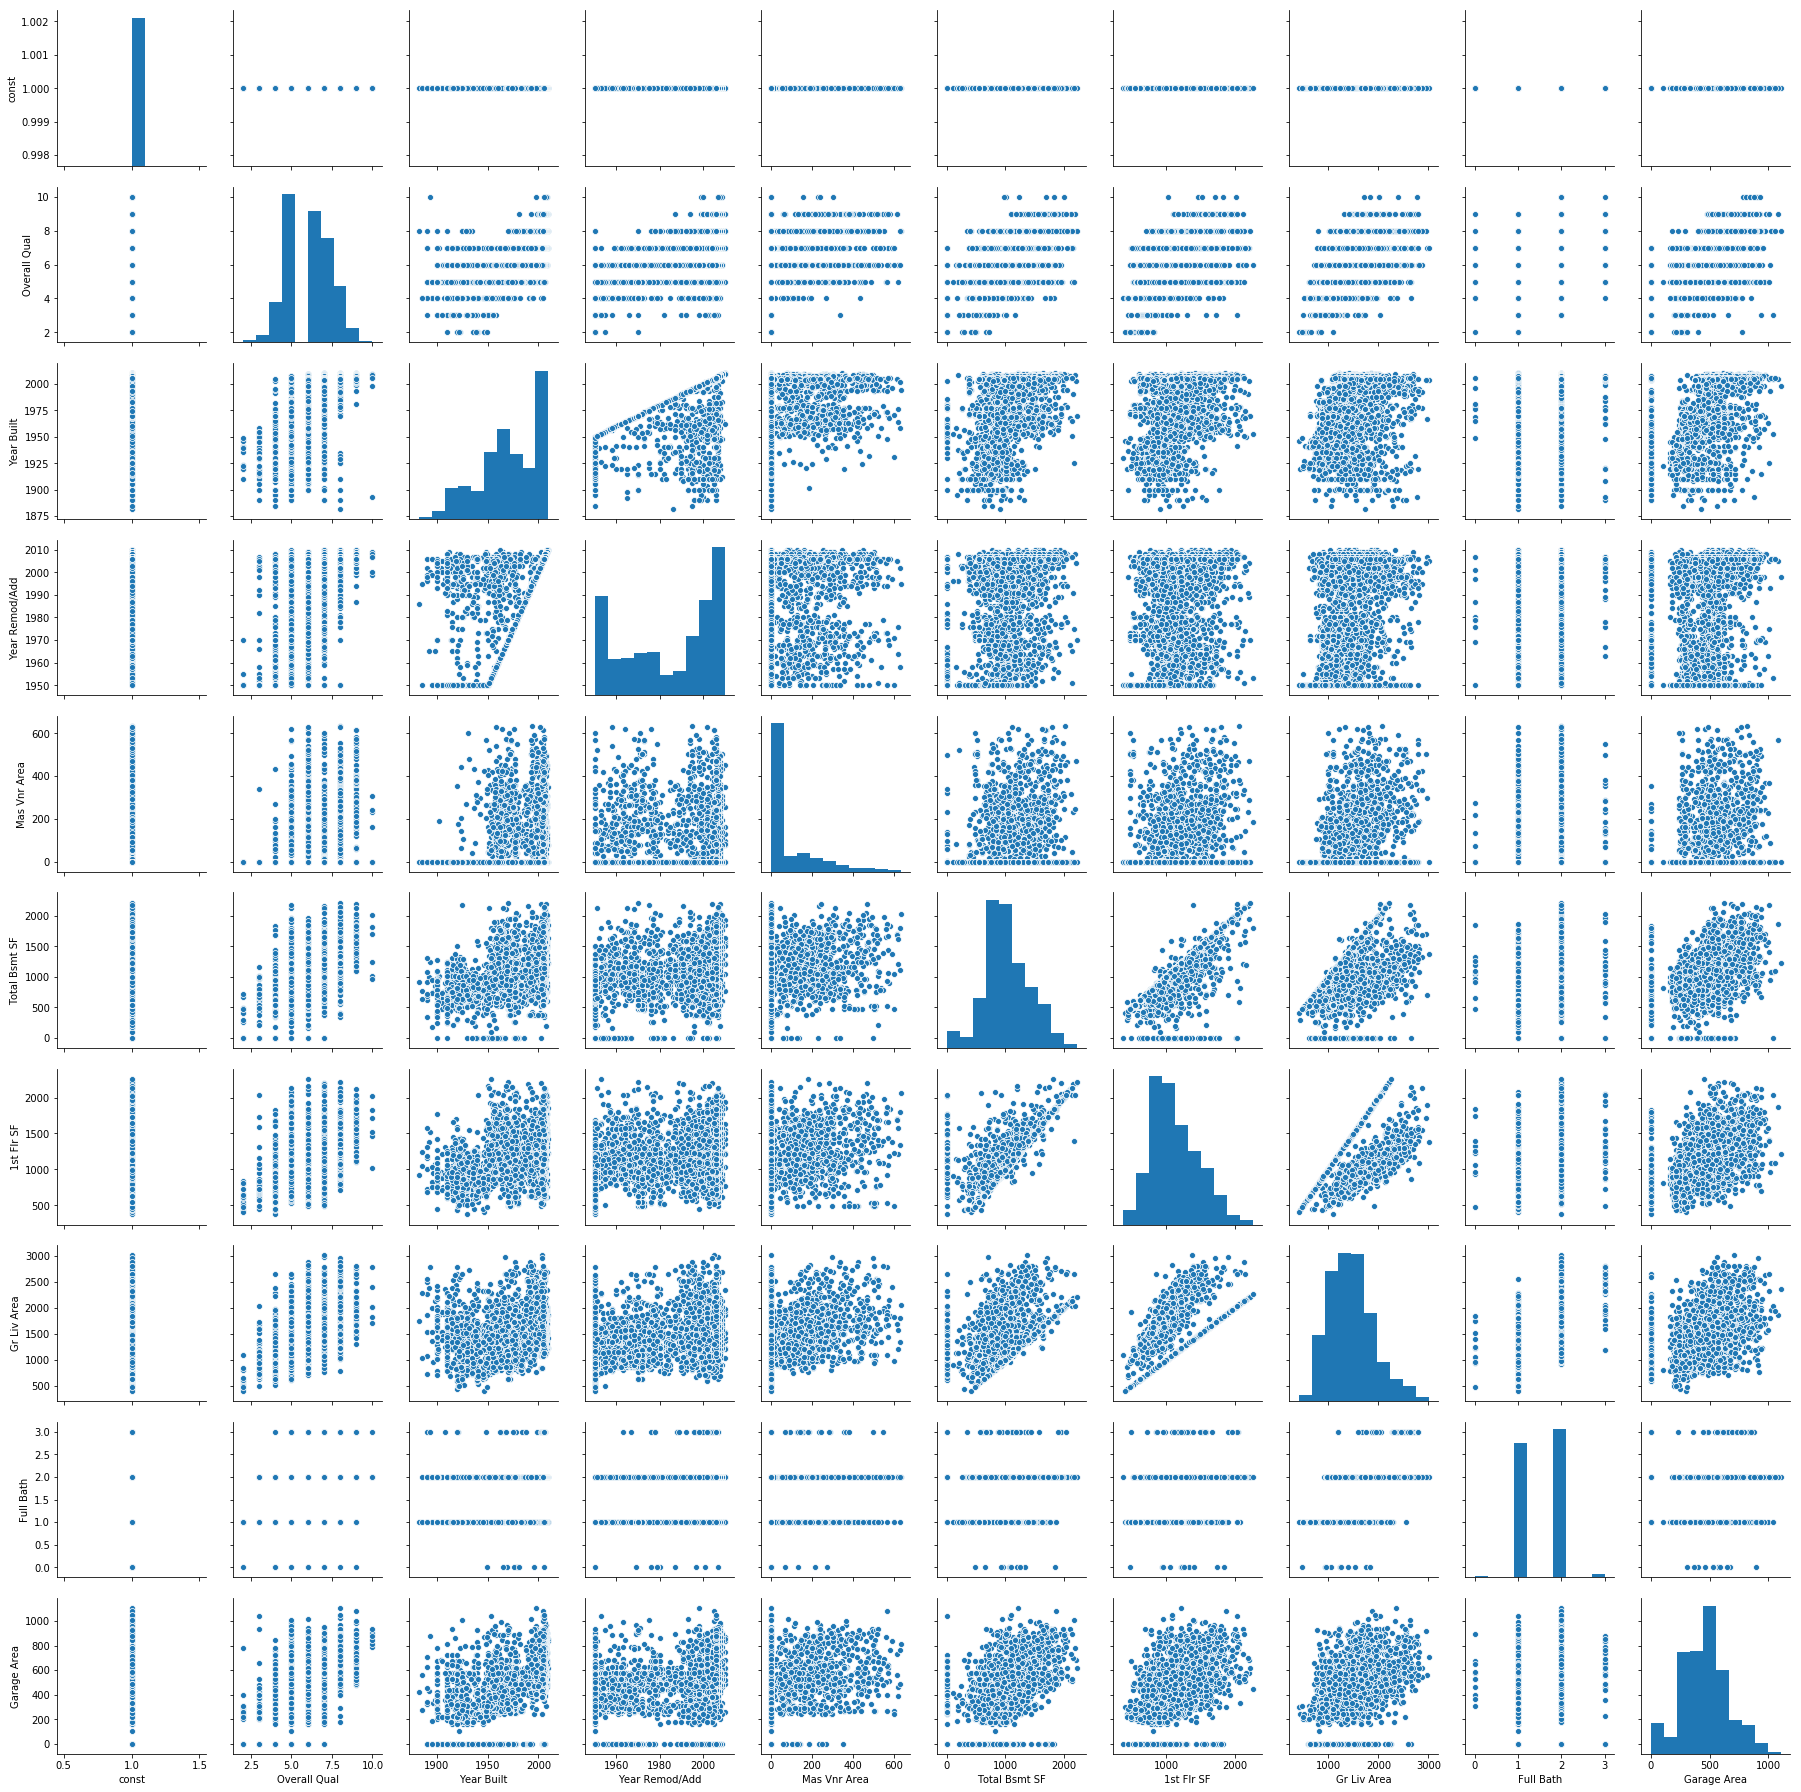

In [73]:
sns.pairplot(X);

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

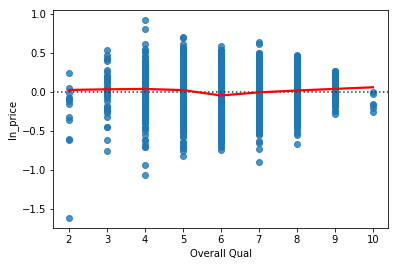

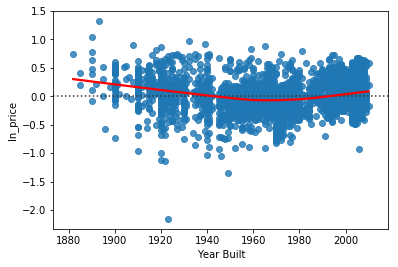

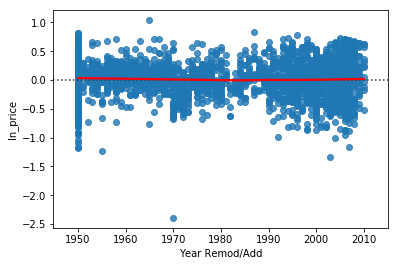

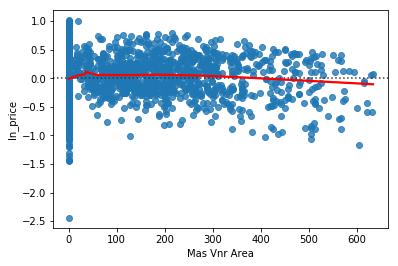

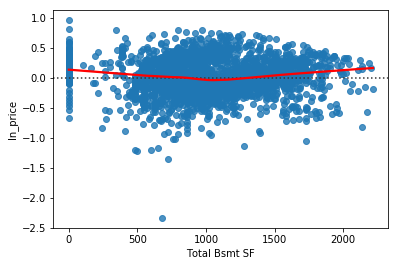

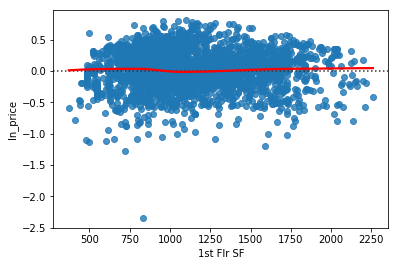

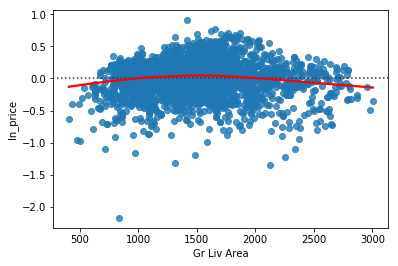

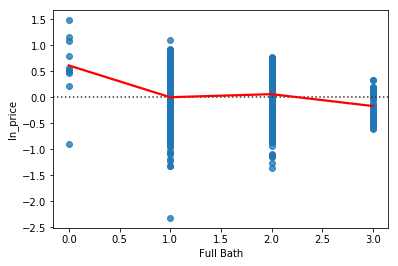

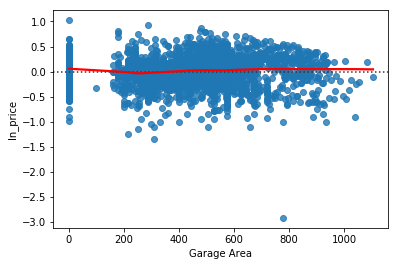

In [74]:
features = features.drop('Garage Cars')
for feature in features:
    sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
    plt.show()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
df['Mas Vnr Area Squared'] = df['Mas Vnr Area'] **2

In [78]:
X = df[['Overall Qual',
'Year Built',
'Year Remod/Add',
'Mas Vnr Area',
'Total Bsmt SF',
'1st Flr SF',
'Gr Liv Area',
'Full Bath',
'Mas Vnr Area Squared',
'Garage Area']]

y = df['ln_price']

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.161e+06
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:44:52   Log-Likelihood:                 1305.3
No. Observations:                2772   AIC:                            -2591.
Df Residuals:                    2762   BIC:                            -2531.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Overall Qual             0.0845 

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.